In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src")


In [2]:
df = pd.read_csv("../data/raw/AmesHousing.csv")
df_cleaned = df.copy()


In [3]:
drop_cols = [
    'Alley','Mas Vnr Type','Fireplace Qu',
    'Pool QC','Fence','Misc Feature'
]

df_cleaned.drop(columns=drop_cols, inplace=True)


In [4]:
missing_mean_cols = [
    'Lot Frontage','Mas Vnr Area','BsmtFin SF 1',
    'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',
    'Bsmt Full Bath','Bsmt Half Bath',
    'Garage Cars','Garage Area'
]

df_cleaned[missing_mean_cols] = df_cleaned[missing_mean_cols].fillna(
    df_cleaned[missing_mean_cols].mean()
)


In [5]:
garage_cat_cols = [
    'Garage Type','Garage Finish','Garage Qual','Garage Cond'
]
df_cleaned[garage_cat_cols] = df_cleaned[garage_cat_cols].fillna("No Garage")

df_cleaned["Electrical"] = df_cleaned["Electrical"].fillna(
    df_cleaned["Electrical"].mode()[0]
)

df_cleaned["Garage Yr Blt"] = df_cleaned["Garage Yr Blt"].fillna(
    df_cleaned["Year Built"]
)

bsmt_cols = [
    'Bsmt Qual','Bsmt Cond','Bsmt Exposure',
    'BsmtFin Type 1','BsmtFin Type 2'
]
df_cleaned[bsmt_cols] = df_cleaned[bsmt_cols].fillna("No Basement")


In [6]:
df_cleaned["Central Air"] = df_cleaned["Central Air"].map({"Y":1,"N":0})


In [7]:
cat_cols = [
    'MS Zoning','Street','Lot Shape','Land Contour','Utilities',
    'Lot Config','Land Slope','Condition 1','Condition 2',
    'Bldg Type','House Style','Roof Style','Roof Matl',
    'Exter Qual','Exter Cond','Foundation',
    'Bsmt Qual','Bsmt Cond','Bsmt Exposure',
    'BsmtFin Type 1','BsmtFin Type 2',
    'Heating','Heating QC','Electrical','Kitchen Qual',
    'Functional','Garage Type','Garage Finish',
    'Garage Qual','Garage Cond','Sale Type',
    'Sale Condition','Neighborhood',
    'Exterior 1st','Exterior 2nd','Paved Drive'
]

df_dummies = pd.get_dummies(
    df_cleaned,
    columns=cat_cols,
    drop_first=True
)


In [8]:
num_cols = [
    'PID','MS SubClass','Lot Frontage','Lot Area',
    'Overall Qual','Overall Cond','Year Built',
    'Year Remod/Add','Mas Vnr Area',
    'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
    'Total Bsmt SF','1st Flr SF','2nd Flr SF',
    'Low Qual Fin SF','Gr Liv Area','TotRms AbvGrd',
    'Garage Yr Blt','Garage Area','Wood Deck SF',
    'Open Porch SF','Enclosed Porch','3Ssn Porch',
    'Screen Porch','Pool Area','Misc Val',
    'Mo Sold','Yr Sold'
]

scaler = StandardScaler()
df_dummies[num_cols] = scaler.fit_transform(df_dummies[num_cols])


In [9]:
df_dummies.to_csv("../data/processed/processed_data.csv", index=False)
print("Processed data saved!")


Processed data saved!


In [10]:
corr_with_target = df_dummies.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

top_features = corr_with_target.abs().sort_values(ascending=False).head(20).index

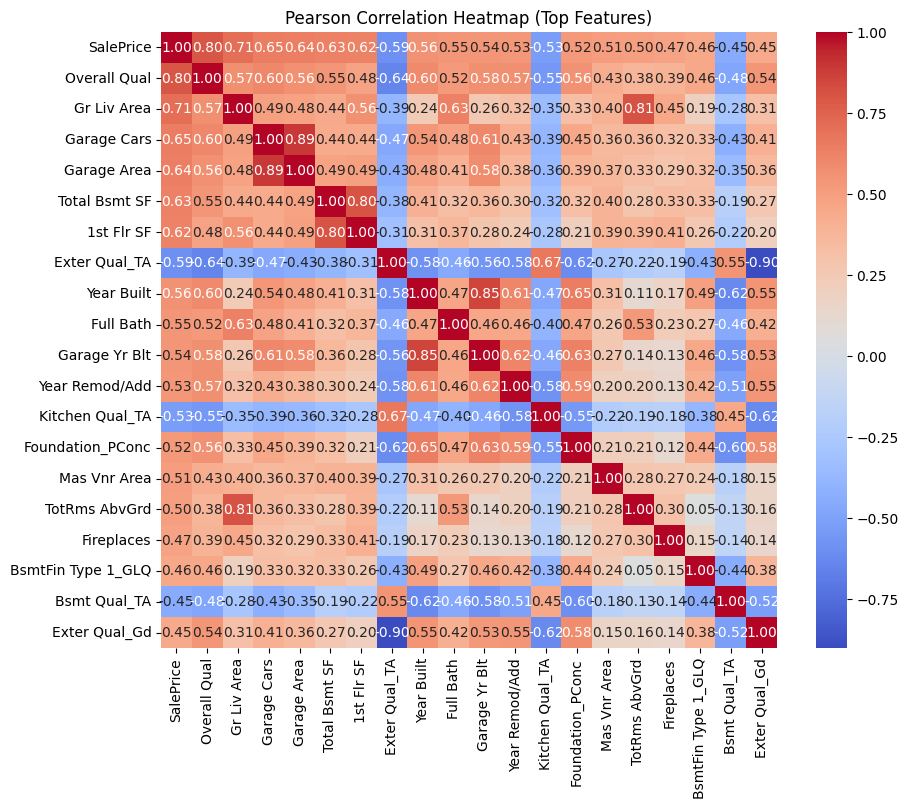

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_dummies[top_features].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True
)
plt.title('Pearson Correlation Heatmap (Top Features)')
plt.show()
plt.savefig("../reports/figures/correlation_heatmap.png", dpi=300, bbox_inches="tight")
